<h1>Imports</h1>

In [43]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [52]:
train = pd.read_csv("CSE368FinalProject/train.csv")

projectedCosts = []
actualCosts = []

difference = 0
    
for house in train.values:
        
    projectedCost = 0

    subClass = int(house[1])
    
    if subClass == 20: projectedCost = 200000
    if subClass == 30: projectedCost = 100000
    if subClass == 40: projectedCost = 150000
    if subClass == 45: projectedCost = 125000
    if subClass == 50: projectedCost = 175000
    if subClass == 60: projectedCost = 200000
    if subClass == 70: projectedCost = 150000
    if subClass == 75: projectedCost = 225000
    if subClass == 80: projectedCost = 125000
    if subClass == 85: projectedCost = 75000
    if subClass == 90: projectedCost = 70000
    if subClass == 120: projectedCost = 175000
    if subClass == 150: projectedCost = 200000
    if subClass == 160: projectedCost = 210000
    if subClass == 180: projectedCost = 180000
    if subClass == 190: projectedCost = 200000

    lotArea = int(house[4])
    projectedCost += int(lotArea * 0.3)

    projectedCost += (int(house[17]) - 5) * 5000
    projectedCost += (int(house[18]) - 5) * 5000

    projectedCost += ((int(house[19])) - 1980) * 2000
    exterqual = house[27]
    qualList = ["Ex","Gd","TA","Fa","Po"]
    location = qualList.index(house[27]) - 2
    projectedCost -= (location * 10000)

    extercond = house[28]
    location = qualList.index(house[28]) - 2
    projectedCost -= (location * 10000)

    if (house[41] == "Y"):
        projectedCost += 2500

    if (house[46] < 1300): projectedCost -= 15000
    elif (2000 < house[46] > 1300): projectedCost += 10000
    else : projectedCost += 20000

    projectedCost += ((house[47]+house[48]+house[49]+house[50])-3)*5000
    projectedCost += (house[51]-3)*5000

    projectedCost += (house[52] - 1)*10000

    functionalList = ["Typ","Min1","Min2","Mod","Maj1","Maj2","Sev","Sal"]
    howbad = functionalList.index(house[55])
    projectedCost -= howbad * 5000

    projectedCost += (house[61]-2)*5000

    projectedCost += house[75]*10

    projectedCost += (house[77]-2000)*50

    actualCost = int(house[80])
    
    projectedCosts.append(projectedCost)
    actualCosts.append(actualCost)
    
    difference += actualCost-projectedCost

avg = difference / len(train)

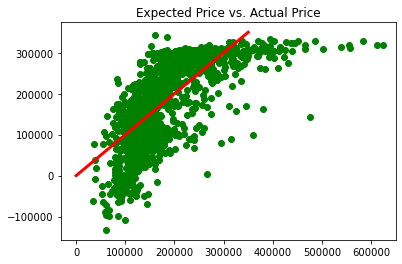

In [78]:
plt.title("Expected Price vs. Actual Price")
line = avg
x = actualCosts
y = projectedCosts
plt.scatter(x,y,color="green")
plt.plot([0,350000],[0,350000],c="red",linewidth=3)

plt.xlim(right=650000)
plt.show()